# Exploratory Data Analysis


## Dataset
Dados históricos dos funcionários.

##### Warning: Dados sensíveis!!!

## Contexto
O RH da empresa está se tornando mais seletivo ao contratar novos funcionários. Dessa forma, ele quer entender o perfil de promoção dos funcionários para que no processo de seleção algum desses fatores sejam considerados. Além disso, um modelo de predição poderia ajudar na definição do budget de promoção. Você faz parte da área de **Data Science** dessa empresa, e precisa encontrar alguns insights que subsidiem o RH.

## Objetivo
Avaliar se existem fatores que influenciam na promoção dos funcionários



In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             roc_auc_score, log_loss)

from plotting import (multiple_histograms_plot, bar_plot_with_categorical, 
                      plot_confusion_matrix, plot_roc)

plt.rcParams["figure.figsize"] = (22,15)

In [2]:
df = pd.read_csv('data/Base Analytics.csv')
df.head()

,ADP,Admissão,Desligamento,Desligado?,Iniciativa Desligamento,Tempo de Casa,Cod.Cargo,Cargo,Cod.Cargo Admissão,Cargo Admissão,...,MERITO 2015,MERITO 2016,MERITO 2017,PROMOÇÃO 2012,PROMOÇÃO 2013,PROMOÇÃO 2014,PROMOÇÃO 2015,PROMOÇÃO 2016,PROMOÇÃO 2017,PROMOVIDO
0,1,10/1/2001,,N,NaN,17.3,762,DIRETORIA,698,GERENTE,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,5,10/1/2001,12/3/2012,Y,Funcionário,11.2,736,DIRETORIA,699,GERENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10,10/1/2001,,N,NaN,17.3,734,GERENTE SR,626,COORDENADOR,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,0
3,14,10/1/2001,5/31/2011,Y,Funcionário,9.7,643,GERENTE,630,COORDENADOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,19,10/1/2001,9/1/2010,Y,Empregador,8.9,681,DIRETORIA,681,DIRETORIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.shape

(597, 63)

In [4]:
df.head().T

,0,1,2,3,4
ADP,1,5,10,14,19
Admissão,10/1/2001,10/1/2001,10/1/2001,10/1/2001,10/1/2001
Desligamento,,12/3/2012,,5/31/2011,9/1/2010
Desligado?,N,Y,N,Y,Y
Iniciativa Desligamento,NaN,Funcionário,NaN,Funcionário,Empregador
Tempo de Casa,17.3,11.2,17.3,9.7,8.9
Cod.Cargo,762,736,734,643,681
Cargo,DIRETORIA,DIRETORIA,GERENTE SR,GERENTE,DIRETORIA
Cod.Cargo Admissão,698,699,626,630,681
Cargo Admissão,GERENTE,GERENTE,COORDENADOR,COORDENADOR,DIRETORIA


In [5]:
df.columns.values

array(['ADP', 'Admissão', 'Desligamento', 'Desligado?',
       'Iniciativa Desligamento', 'Tempo de Casa', 'Cod.Cargo', 'Cargo',
       'Cod.Cargo Admissão', 'Cargo Admissão', 'CC', 'Area', 'Diretoria',
       'Estado Civil', 'Educação', 'Idade Atual/ Desligamento',
       'Idade na Admissão', 'Sexo', 'Banda', 'Nivel', 'Hora Extra 2016',
       'Hora Negativa 2016', 'Ad. Noturno 2016', 'Absenteísmo 2016',
       'Hora Extra 2017', 'Hora Negativa 2017', 'Ad. Noturno 2017',
       'Absenteísmo 2017', '2012/13 Rating', '2012/13 Goal Achievement',
       '2013/14 Rating', '2013/14 Goal Achievement', '2014/15 Rating',
       '2014/15 Goal Achievement', '2015/16 Rating',
       '2015/16 Goal Achievement', '2016/17 Rating',
       '2016/17 Goal Achievement', 'AUMENTO 2012', 'AUMENTO 2013',
       'AUMENTO 2014', 'AUMENTO 2015', 'AUMENTO 2016', 'AUMENTO 2017',
       'DISSIDIO 2012', 'DISSIDIO 2013', 'DISSIDIO 2014', 'DISSIDIO 2015',
       'DISSIDIO 2016', 'DISSIDIO 2017', 'MERITO 2012', 'MER

In [6]:
df.dtypes

ADP                            int64
Admissão                      object
Desligamento                  object
Desligado?                    object
Iniciativa Desligamento       object
Tempo de Casa                float64
Cod.Cargo                      int64
Cargo                         object
Cod.Cargo Admissão             int64
Cargo Admissão                object
CC                             int64
Area                          object
Diretoria                     object
Estado Civil                  object
Educação                      object
Idade Atual/ Desligamento    float64
Idade na Admissão            float64
Sexo                          object
Banda                          int64
Nivel                         object
Hora Extra 2016              float64
Hora Negativa 2016           float64
Ad. Noturno 2016             float64
Absenteísmo 2016             float64
Hora Extra 2017              float64
Hora Negativa 2017           float64
Ad. Noturno 2017             float64
A

In [7]:
#-- verificando a quantidade de missing values
null_count = df.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
2012/13 Goal Achievement,597.0,1.000000
DISSIDIO 2017,596.0,0.998325
AUMENTO 2014,589.0,0.986600
AUMENTO 2012,589.0,0.986600
PROMOÇÃO 2013,585.0,0.979899
PROMOÇÃO 2014,582.0,0.974874
PROMOÇÃO 2012,581.0,0.973199
AUMENTO 2013,576.0,0.964824
AUMENTO 2017,573.0,0.959799
PROMOÇÃO 2016,572.0,0.958124


In [8]:
#-- verificando menor data de admissão
min(df['Admissão'])

'1/1/2007'

In [9]:
#-- filtrando pela data de admissão
df_ano = df[df['Admissão'] >= '2011-01-01']
df_ano.shape

(356, 63)

In [10]:
df['Admissão'] = pd.to_datetime(df['Admissão'])

In [11]:
#-- filtrando pela data de admissão
df_ano = df[df['Admissão'] >= '2011-01-01']
df_ano.shape

(439, 63)

In [12]:
min(df['Admissão'])

Timestamp('2001-06-18 00:00:00')

In [13]:
#-- verificando os missing values do dataset
null_count = df_ano.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df_ano)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
2012/13 Goal Achievement,439.0,1.000000
DISSIDIO 2017,438.0,0.997722
PROMOÇÃO 2012,435.0,0.990888
PROMOÇÃO 2013,434.0,0.988610
AUMENTO 2012,432.0,0.984055
AUMENTO 2014,431.0,0.981777
AUMENTO 2013,430.0,0.979499
PROMOÇÃO 2014,428.0,0.974943
MERITO 2012,424.0,0.965831
AUMENTO 2017,418.0,0.952164


### Distribuição das Idades

/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


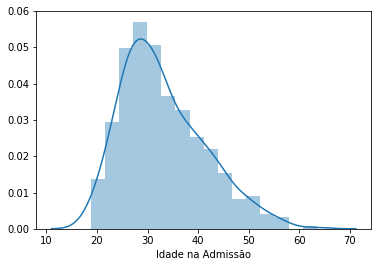

In [14]:
#-- pritando um histograma da idade de admissão dos funcionários
sns.distplot(df_ano['Idade na Admissão'])

### Hora Extra

/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/macbook/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/macbook/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

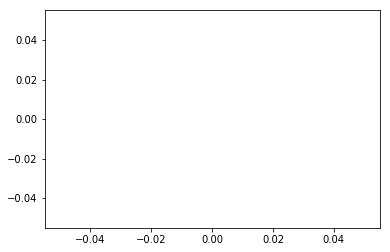

In [15]:
#-- plotando o gráfico das horas extras
sns.distplot(df_ano['Hora Extra 2016'])

In [16]:
#-- preenchendo os missing values com flags
df_ano['Hora Extra 2016'] = df_ano['Hora Extra 2016'].fillna(-100)

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


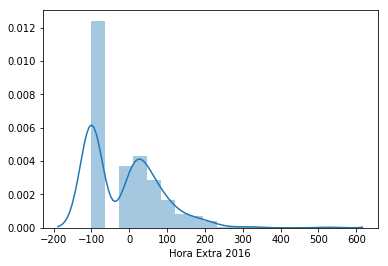

In [17]:
#-- plotando o hostograma das horas extras
sns.distplot(df_ano['Hora Extra 2016'])

### Qual a idade de desligamento?

/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


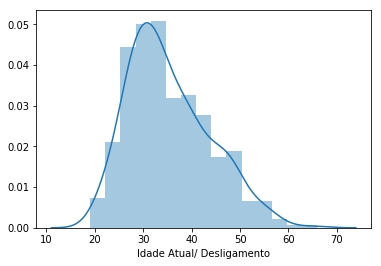

In [18]:
#-- plotando o histograma da idade de desligamento
sns.distplot(df_ano['Idade Atual/ Desligamento'])

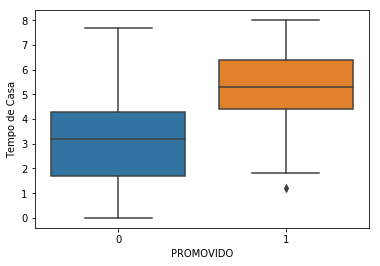

In [19]:
#-- plotando boxplot da promoção pelo tempo de casa
sns.boxplot(x=df_ano['PROMOVIDO'], y=df_ano['Tempo de Casa'])

## Preparando os dados

In [20]:
#-- separando a variável do dataset de análise
X = df_ano.drop(columns=['PROMOVIDO'])
y = df_ano['PROMOVIDO']

In [21]:
#-- separando os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

## Aplicando a Regressão Logística

In [22]:
#-- guardando o algoritmo de regressão logística
logreg = LogisticRegression()

In [23]:
#-- aplicando o algoritmo 
logreg.fit(X_train, y_train)
#-- predizendo as respostas
y_pred = logreg.predict(X_test)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Y'

#### Filtrando somente os valores numéricos

In [54]:
#-- selecionadndo apenas as variáveis númericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_ano.select_dtypes(include=numerics).copy()
df_numeric.head().T

,123,124,125,126,127
ADP,153.000000,154.000000,155.000000,156.000000,157.000000
Tempo de Casa,8.000000,7.800000,6.200000,0.500000,7.700000
Cod.Cargo,955.000000,825.000000,681.000000,791.000000,773.000000
Cod.Cargo Admissão,743.000000,783.000000,681.000000,791.000000,773.000000
CC,1100.000000,1016.000000,1120.000000,1100.000000,1040.000000
Idade Atual/ Desligamento,30.000000,38.000000,47.901370,31.402740,48.000000
Idade na Admissão,24.178082,32.249315,41.726027,30.950685,42.534247
Banda,400.000000,300.000000,700.000000,700.000000,700.000000
Hora Extra 2016,-100.000000,90.566667,-100.000000,-100.000000,-100.000000
Hora Negativa 2016,NaN,8.500000,NaN,NaN,NaN


In [55]:
df_numeric = (df_numeric.drop(columns=['ADP', 'Cod.Cargo', 'Cod.Cargo Admissão', 
                                      'CC', 'Hora Extra 2016', 'Hora Negativa 2016', 
                                      'Ad. Noturno 2016', 'Absenteísmo 2016', 'Hora Extra 2017', 
                                      'Hora Negativa 2017', 'Ad. Noturno 2017', 'Absenteísmo 2017', 'Banda', 
                                      '2012/13 Goal Achievement'], axis=1)
                        .dropna())

In [56]:
#-- verificando se ainda existem missing values
df_numeric.isnull().sum()

Tempo de Casa                0
Idade Atual/ Desligamento    0
Idade na Admissão            0
2013/14 Goal Achievement     0
2014/15 Goal Achievement     0
2015/16 Goal Achievement     0
2016/17 Goal Achievement     0
PROMOVIDO                    0
dtype: int64

In [57]:
#-- printando as dimensões
df_numeric.shape

(77, 8)

In [58]:
#-- verificando os tipos das variáveis
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 123 to 272
Data columns (total 8 columns):
Tempo de Casa                77 non-null float64
Idade Atual/ Desligamento    77 non-null float64
Idade na Admissão            77 non-null float64
2013/14 Goal Achievement     77 non-null float64
2014/15 Goal Achievement     77 non-null float64
2015/16 Goal Achievement     77 non-null float64
2016/17 Goal Achievement     77 non-null float64
PROMOVIDO                    77 non-null int64
dtypes: float64(7), int64(1)
memory usage: 5.4 KB


In [59]:
X = df_numeric.drop(columns=['PROMOVIDO'])
y = df_numeric['PROMOVIDO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Avaliação do modelo

In [61]:
accuracy_test = accuracy_score(y_test, y_pred)
print(f'accuracy (test): {accuracy_test*100:.1f}%')

accuracy (test): 41.7%


Confusion matrix, without normalization
[[ 5 11]
 [ 3  5]]


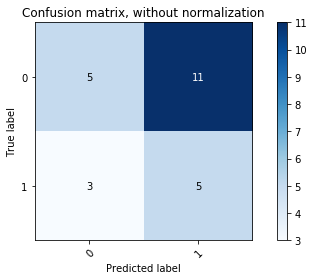

Normalized confusion matrix
[[0.3125 0.6875]
 [0.375  0.625 ]]


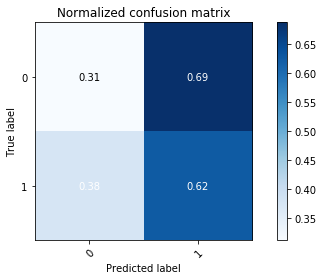

In [65]:
plt.rcParams["figure.figsize"] = (7,4)
plot_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalize=True)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.31      0.42        16
           1       0.31      0.62      0.42         8

   micro avg       0.42      0.42      0.42        24
   macro avg       0.47      0.47      0.42        24
weighted avg       0.52      0.42      0.42        24



### E se alterássemos os cortes?

In [36]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

In [37]:
#-- comparando as respostas
preds_df = pd.DataFrame(data=[y_pred_proba, y_test.astype(str)],
                        index=['Prediction', 'True Value']).T

preds_df['Prediction'] = preds_df['Prediction'].astype(float)
preds_df['True Value'] = preds_df['True Value'].astype(str)

preds_df.head()

,Prediction,True Value
0,0.953435,0
1,0.767354,0
2,0.343212,0
3,0.133422,0
4,0.795719,0


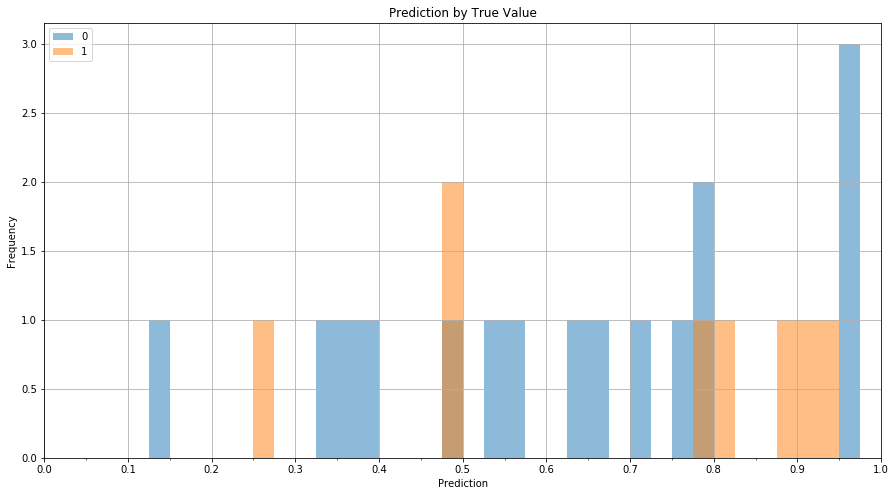

In [38]:
multiple_histograms_plot(data=preds_df, x='Prediction', hue='True Value',
                         bins=np.arange(0, 1.1, 0.025), probability_hist=True)

In [42]:
#-- ajustando o corte
y_pred_customizado = y_pred_proba >= 0.80

Confusion matrix, without normalization
[[13  3]
 [ 4  4]]


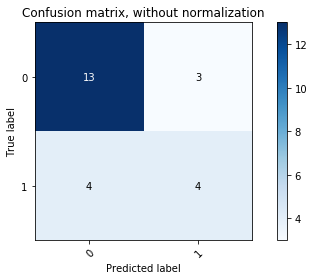

Normalized confusion matrix
[[0.8125 0.1875]
 [0.5    0.5   ]]


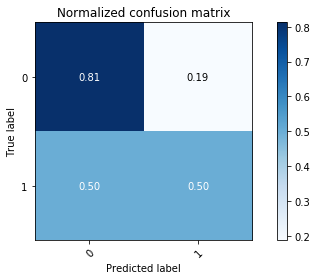

In [68]:
#-- pritando a nova matriz de confusão
plot_confusion_matrix(y_test, y_pred_customizado)
plot_confusion_matrix(y_test, y_pred_customizado, normalize=True)

In [41]:
#-- printando as novas métricas
print(classification_report(y_test, y_pred_customizado))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.57      0.50      0.53         8

   micro avg       0.71      0.71      0.71        24
   macro avg       0.67      0.66      0.66        24
weighted avg       0.70      0.71      0.70        24

